# gakkaiのやつ
## シミュレーション設定
* セクション数 : N = 5
* 軌道の形状 : 円

In [111]:
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.facecolor'] = 'white'
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['font.size'] = 18
#plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['lines.linewidth'] = 4
from make_figure import *


size = (6, 4)

In [102]:
rmp_path = r"/home/matsuta/src/ctrlab2021_soudan/result/2022-01-28--20-48-33"
pdfb_path = r"/home/matsuta/src/ctrlab2021_soudan/result/2022-01-28--19-55-03"


pad, ptd, N, T = load_df_from_csv(rmp_path)
cad, ctd, _, _ = load_df_from_csv(pdfb_path)

size = (6, 4)

## 使用した制御パラメータ

In [115]:
with open(rmp_path + "/controller_param.yaml", encoding='UTF-8') as file:
    rmp = yaml.safe_load(file.read())
with open(pdfb_path + "/controller_param.yaml", encoding='UTF-8') as file:
    pdfb = yaml.safe_load(file.read())


In [113]:
rmp

{'attractor': {'A_damp_r': 0.01,
  'a_damp_r': 0.05,
  'gain': 15000,
  'max_speed': 1800,
  'sigma_H': 1,
  'sigma_W': 1},
 'jlavoidance': {'gamma_d': 1, 'gamma_p': 4, 'lam': 1},
 'name': 'rmp'}

In [116]:
pdfb

{'Kd': 10, 'Kp': 250, 'name': 'pdfb'}

## 目標軌道のパラメータ

* r : 半径
* omega : 角速度
* center : 中心
* alpha, beta, gamma : ３次元回転


In [117]:
with open(rmp_path + "/envireonment.yaml", encoding='UTF-8') as file:
    env = yaml.safe_load(file.read())
env

{'goal': {4: {'name': 'Circle',
   'param': {'alpha': 0,
    'beta': 0,
    'center': [0.0, 0.0, 0.75],
    'gamma': 0,
    'omega': 1.5,
    'r': 0.2}}},
 'target_param': None}

In [103]:
pad

,t,l_0_0,l_0_1,l_0_2,l_1_0,l_1_1,l_1_2,l_2_0,l_2_1,l_2_2,...,l_dot_1_2,l_dot_2_0,l_dot_2_1,l_dot_2_2,l_dot_3_0,l_dot_3_1,l_dot_3_2,l_dot_4_0,l_dot_4_1,l_dot_4_2
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.01,-0.000059,0.000084,0.000087,-0.000036,0.000073,0.000075,-1.418298e-05,0.000063,0.000064,...,0.015308,-0.001888,0.012714,0.013045,0.002177,0.010750,0.010945,0.006052,0.008878,0.008943
2,0.02,-0.000209,0.000363,0.000378,-0.000093,0.000307,0.000317,5.448206e-07,0.000262,0.000269,...,0.033743,0.007661,0.027561,0.028275,0.014478,0.024321,0.024701,0.019169,0.022107,0.022225
3,0.03,-0.000440,0.000921,0.000963,-0.000042,0.000730,0.000756,2.037227e-04,0.000613,0.000628,...,0.053752,0.036173,0.042170,0.042877,0.042807,0.039106,0.039313,0.041983,0.039603,0.039637
4,0.04,-0.000791,0.001837,0.001933,0.000265,0.001337,0.001382,7.723272e-04,0.001097,0.001115,...,0.070631,0.078504,0.054447,0.054440,0.080162,0.053859,0.053372,0.069475,0.059073,0.058840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,5.95,0.009739,0.002905,0.006372,0.006081,0.006922,0.006223,6.431619e-03,0.006347,0.006452,...,0.000743,0.000121,0.000020,-0.000036,0.000024,0.000042,0.000040,0.000037,0.000033,0.000036
596,5.96,0.009769,0.002936,0.006313,0.006077,0.006920,0.006231,6.432846e-03,0.006348,0.006452,...,0.000746,0.000121,0.000023,-0.000036,0.000024,0.000043,0.000040,0.000037,0.000034,0.000036
597,5.97,0.009797,0.002967,0.006254,0.006073,0.006918,0.006238,6.434037e-03,0.006348,0.006451,...,0.000748,0.000120,0.000026,-0.000037,0.000024,0.000044,0.000041,0.000038,0.000035,0.000037
598,5.98,0.009824,0.002999,0.006196,0.006068,0.006916,0.006246,6.435199e-03,0.006348,0.006451,...,0.000750,0.000119,0.000029,-0.000037,0.000025,0.000044,0.000042,0.000038,0.000035,0.000037


In [104]:
ptd

,t,p_0_x,p_0_y,p_0_z,p_1_x,p_1_y,p_1_z,p_2_x,p_2_y,p_2_z,p_3_x,p_3_y,p_3_z,p_4_x,p_4_y,p_4_z,pd_4_x,pd_4_y,pd_4_z,error_of_sec_4
0,0.00,0.000000,0.000000,0.148500,0.000000,0.000000,0.298500,0.000000,0.000000,0.448500,0.000000,0.000000,0.598500,0.000000,0.000000,0.748500,0.200000,0.000000,0.75,0.200006
1,0.01,0.000565,0.000009,0.148536,0.002148,0.000036,0.298564,0.004484,0.000074,0.448584,0.007317,0.000121,0.598594,0.010396,0.000173,0.748600,0.199978,0.003000,0.75,0.189607
2,0.02,0.002274,0.000049,0.148652,0.008502,0.000184,0.298697,0.017420,0.000378,0.448608,0.028006,0.000610,0.598412,0.039392,0.000860,0.748157,0.199910,0.005999,0.75,0.160611
3,0.03,0.005432,0.000139,0.148844,0.019587,0.000517,0.298647,0.038564,0.001035,0.447923,0.059994,0.001627,0.596869,0.082435,0.002253,0.745666,0.199798,0.008997,0.75,0.117636
4,0.04,0.010543,0.000298,0.148985,0.036280,0.001116,0.297746,0.067724,0.002158,0.445425,0.100677,0.003286,0.592776,0.133767,0.004441,0.740096,0.199640,0.011993,0.75,0.067040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,5.95,-0.020674,0.012561,0.152268,-0.060625,0.034798,0.301835,-0.098719,0.054875,0.452201,-0.136941,0.075285,0.602490,-0.175162,0.095652,0.752785,-0.175538,0.095846,0.75,0.002817
596,5.96,-0.020849,0.012247,0.152270,-0.061127,0.033881,0.301838,-0.099522,0.053386,0.452203,-0.138051,0.073222,0.602490,-0.176578,0.093015,0.752784,-0.176956,0.093202,0.75,0.002816
597,5.97,-0.021019,0.011931,0.152271,-0.061614,0.032957,0.301841,-0.100303,0.051885,0.452204,-0.139129,0.071141,0.602491,-0.177953,0.090355,0.752784,-0.178334,0.090538,0.75,0.002816
598,5.98,-0.021185,0.011612,0.152273,-0.062087,0.032025,0.301843,-0.101060,0.050372,0.452206,-0.140174,0.069044,0.602493,-0.179285,0.087675,0.752785,-0.179672,0.087853,0.75,0.002817


## 誤差グラフ
エンドエフェクタと目標軌道との誤差ベクトルの絶対値

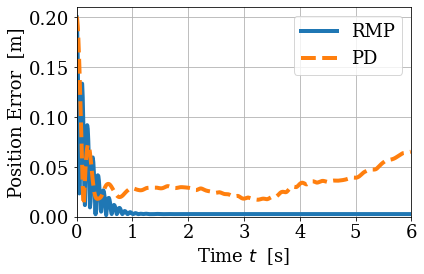

In [105]:
fig_error = plt.figure(figsize=size)
ax = fig_error.add_subplot(111)
ax.plot(ptd['t'], ptd['error_of_sec_4'], label='RMP', linestyle='solid')
ax.plot(ctd['t'], ctd['error_of_sec_4'], label='PD', linestyle='dashed')
#ax.set_xlim(0, ptd['t'].tail(1).item())
ax.set_xlim(0, 6)
ax.set_ylim(bottom=0)
ax.set_xlabel(r'Time $\it{t}$  [s]')
ax.set_ylabel(r"Position Error  [m]")
ax.legend()
ax.grid()

fig_error.savefig('error_of_sec4.png')

## アクチュエータ変位のグラフ
根本から1つめのセクションのみ  
他のも欲しかったら言って  

In [106]:
yl = -0.01
yu = 0.03

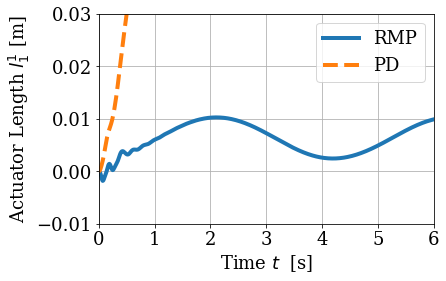

In [107]:
fig = plt.figure(figsize=size)
ax = fig.add_subplot(111)
ax.plot(pad['t'], pad['l_0_0'], label='RMP', linestyle='solid')
ax.plot(cad['t'], cad['l_0_0'], label='PD', linestyle='dashed')
#ax.set_xlim(0, ptd['t'].tail(1).item())
ax.set_xlim(0, 6)
ax.set_ylim(yl, yu)
ax.set_xlabel(r'Time $\it{t}$  [s]')
ax.set_ylabel(r'Actuator Length $\it{l^1_1}$ [m]')
ax.legend()
ax.grid()

fig.savefig('q1_1.png')

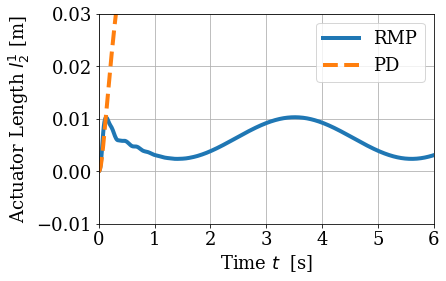

In [108]:

fig = plt.figure(figsize=size)
ax = fig.add_subplot(111)
ax.plot(pad['t'], pad['l_0_1'], label='RMP', linestyle='solid')
ax.plot(cad['t'], cad['l_0_1'], label='PD', linestyle='dashed')
#ax.set_xlim(0, ptd['t'].tail(1).item())
ax.set_xlim(0, 6)
ax.set_ylim(yl, yu)
ax.set_xlabel(r'Time $\it{t}$  [s]')
ax.set_ylabel(r'Actuator Length $\it{l^1_2}$ [m]')
ax.legend()
ax.grid()

fig.savefig('q1_2.png')

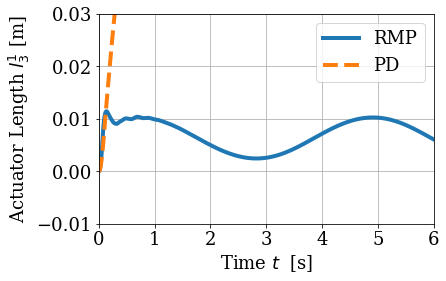

In [109]:
fig = plt.figure(figsize=size)
ax = fig.add_subplot(111)
ax.plot(pad['t'], pad['l_0_2'], label='RMP', linestyle='solid')
ax.plot(cad['t'], cad['l_0_2'], label='PD', linestyle='dashed')
#ax.set_xlim(0, ptd['t'].tail(1).item())
ax.set_xlim(0, 6)
ax.set_ylim(yl, yu)
ax.set_xlabel(r'Time $\it{t}$  [s]')
ax.set_ylabel(r'Actuator Length $\it{l^1_3}$ [m]')
ax.legend()
ax.grid()

fig.savefig('q1_3.png')